<a href="https://colab.research.google.com/github/c-tong02/Portafolio-de-Analitica/blob/main/Precios_de_Vivienda_en_Melbourne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CASO DE USO 1: "Panorama de la vivienda en Melbourne"**
El sector inmobiliario de Melbourne está en AUGE. ¿Se puede encontrar la perspectiva o predecir la próxima gran tendencia para convertirse en un magnate inmobiliario... o aún más difícil, para adquirir una unidad de 2 dormitorios a un precio razonable?

Data:

melb_data.csv

Este conjunto de datos se obtuvo de consultar la sgte url: ‎‎https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot.


## **Leyendo Librerias**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# LIBRERIAS PARA MACHINE LEARNING
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/esabunor/MLWorkspace/master/melb_data.csv", sep = ",")
df.drop(df.columns[0], axis=1, inplace = True)
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  CouncilArea    12233 non-null  object 
 17  Lattitude      15064 non-null  float64
 18  Longti

In [ ]:
#@title Eliminando columnas no necesarias
array_delete = ["CouncilArea"]
df.drop(columns = array_delete, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  BuildingArea   7762 non-null   float64
 15  YearBuilt      8958 non-null   float64
 16  Lattitude      15064 non-null  float64
 17  Longtitude     15064 non-null  float64
 18  Region

Elimino estas columnas ya que al tener datos de latitud y longitud, nos dan una precisión mucho más exacta de la ubicación del lugar. Considero que las variables CouncilArea es una variable categórica de referencia.

# **Realizar**:
- Imputación de Datos
- Eliminación de outliers en un máximo de 10% de contaminación.
- Comparar que estrategia es más adecuada: RIC univariante o Metodo multivariante (seleccionar 3 algoritmos de PyOD)

In [ ]:
#@title Análisis de valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])

  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)

  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(15,15))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.ylim([0,100])
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)



  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
         Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0    BuildingArea            7762        10634   57.806
1       YearBuilt            8958         9438   51.305
2        Landsize           13603         4793   26.055
3             Car           14820         3576   19.439
4        Bathroom           14925         3471   18.868
5        Bedroom2           14927         3469   18.857
6      Longtitude           15064         3332   18.113
7       Lattitude           15064         3332   18.113
8      Regionname           18395            1    0.005
9   Propertycount           18395            1    0.005
10       Postcode           18395            1    0.005
11       Distance           18395            1    0.005
12        Ad

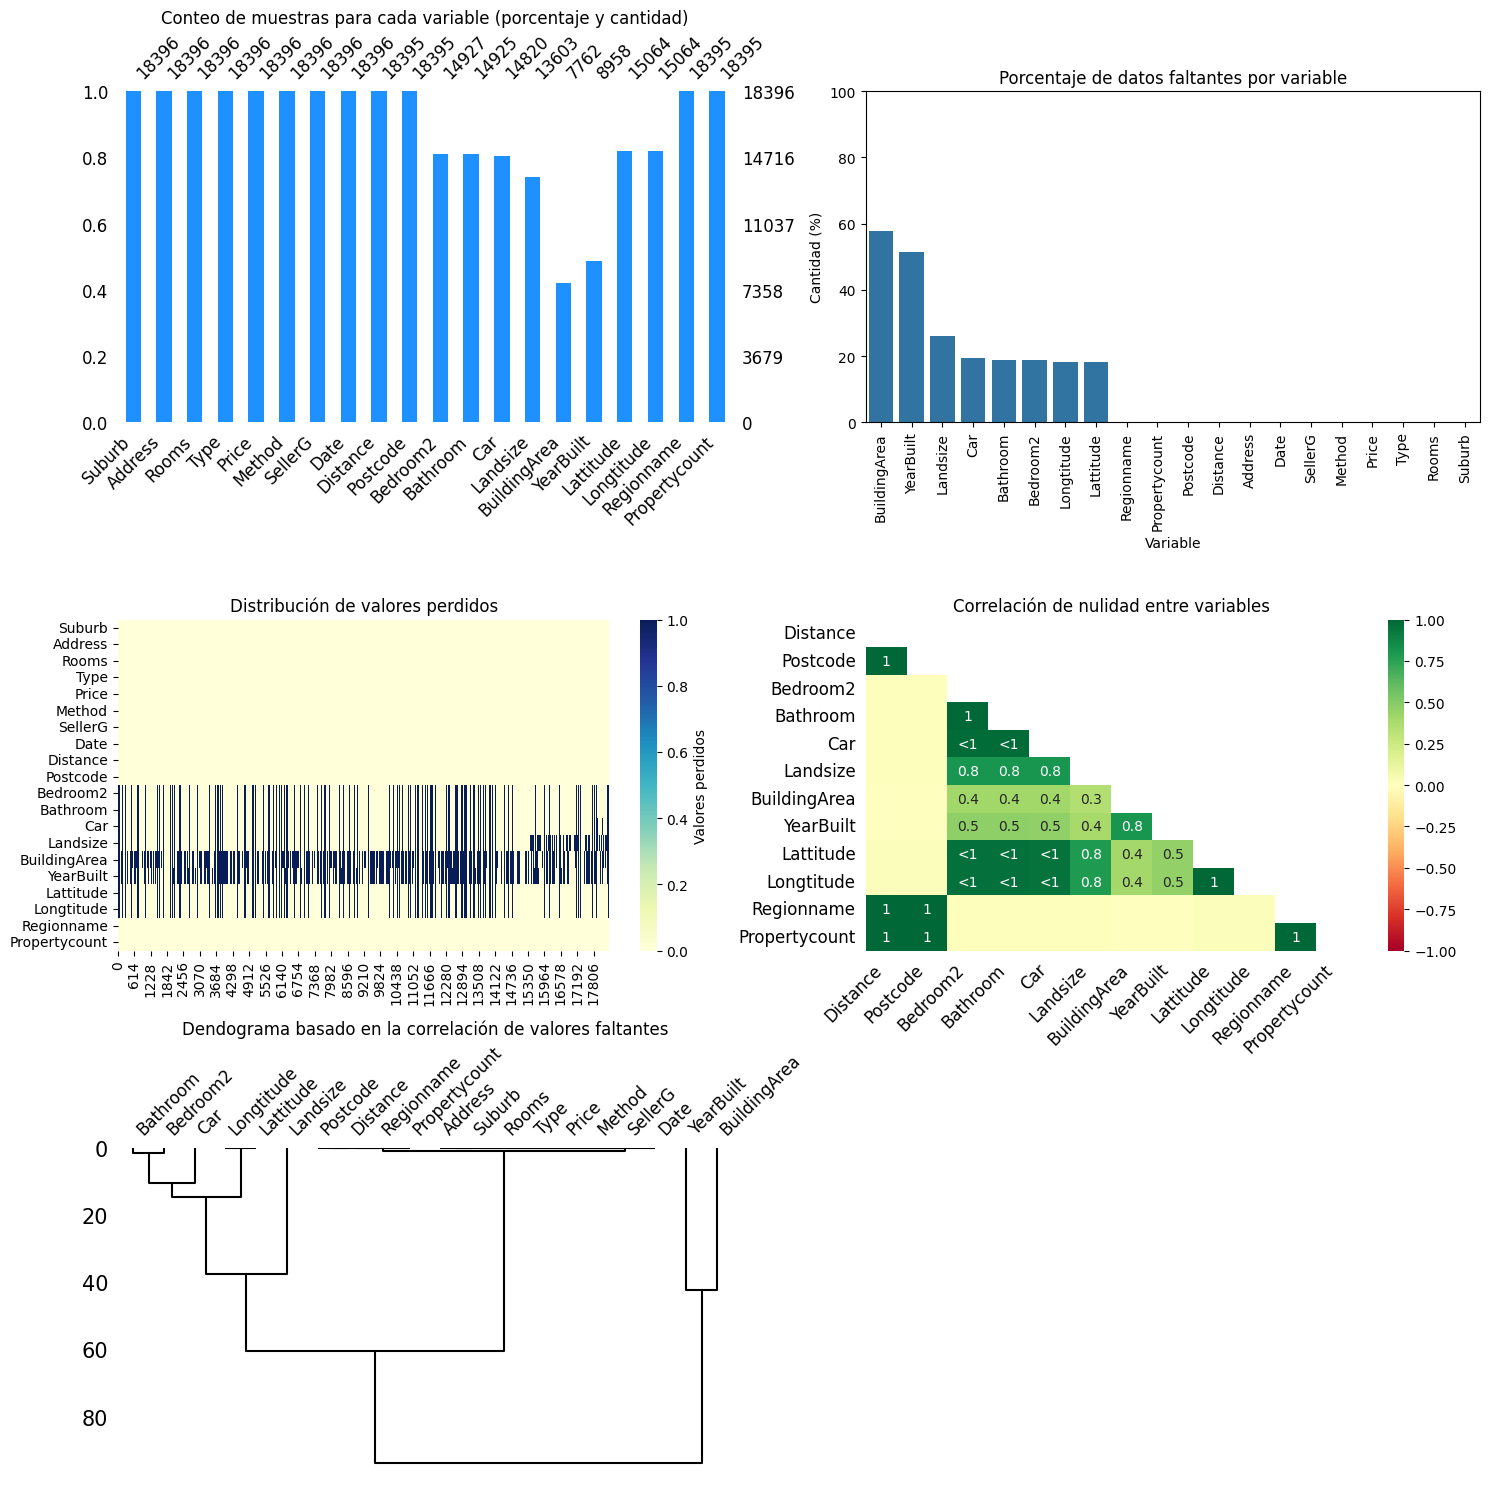

In [ ]:
report_missings(df)

<Axes: >

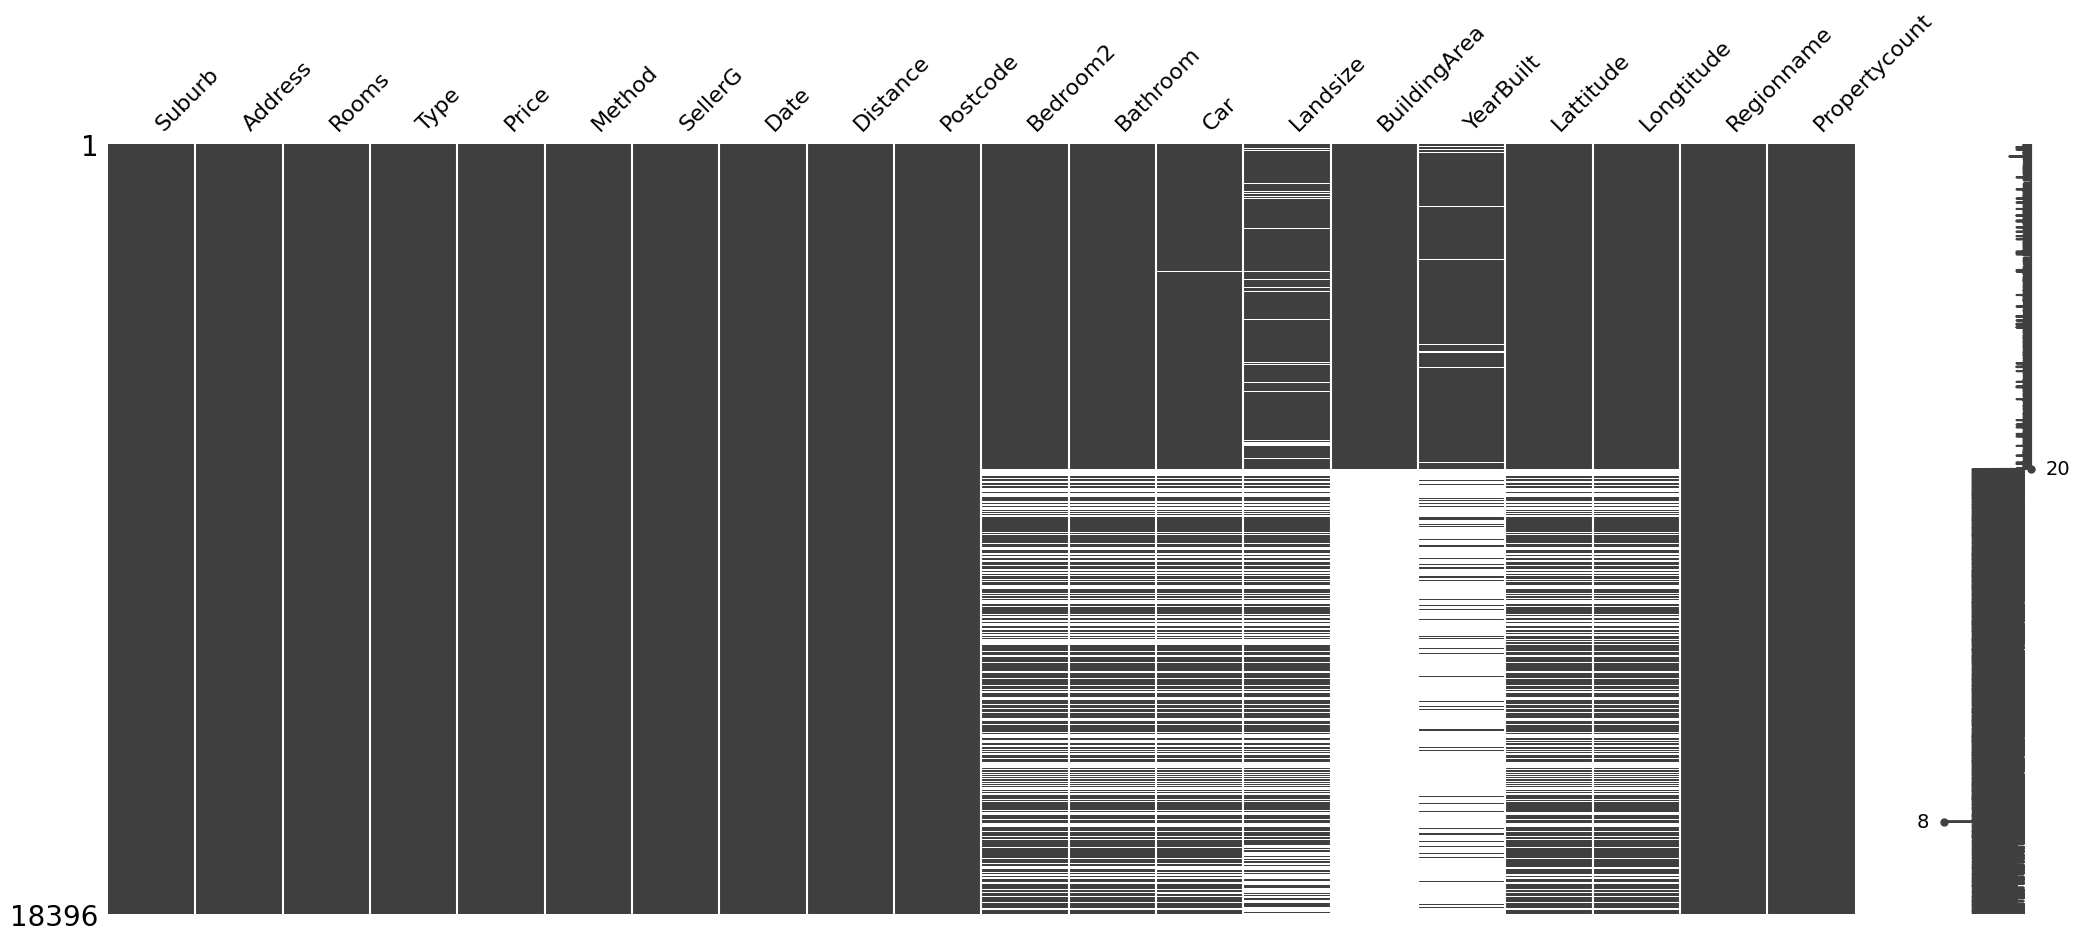

In [ ]:
missingno.matrix(df.sort_values("BuildingArea"))

<Axes: >

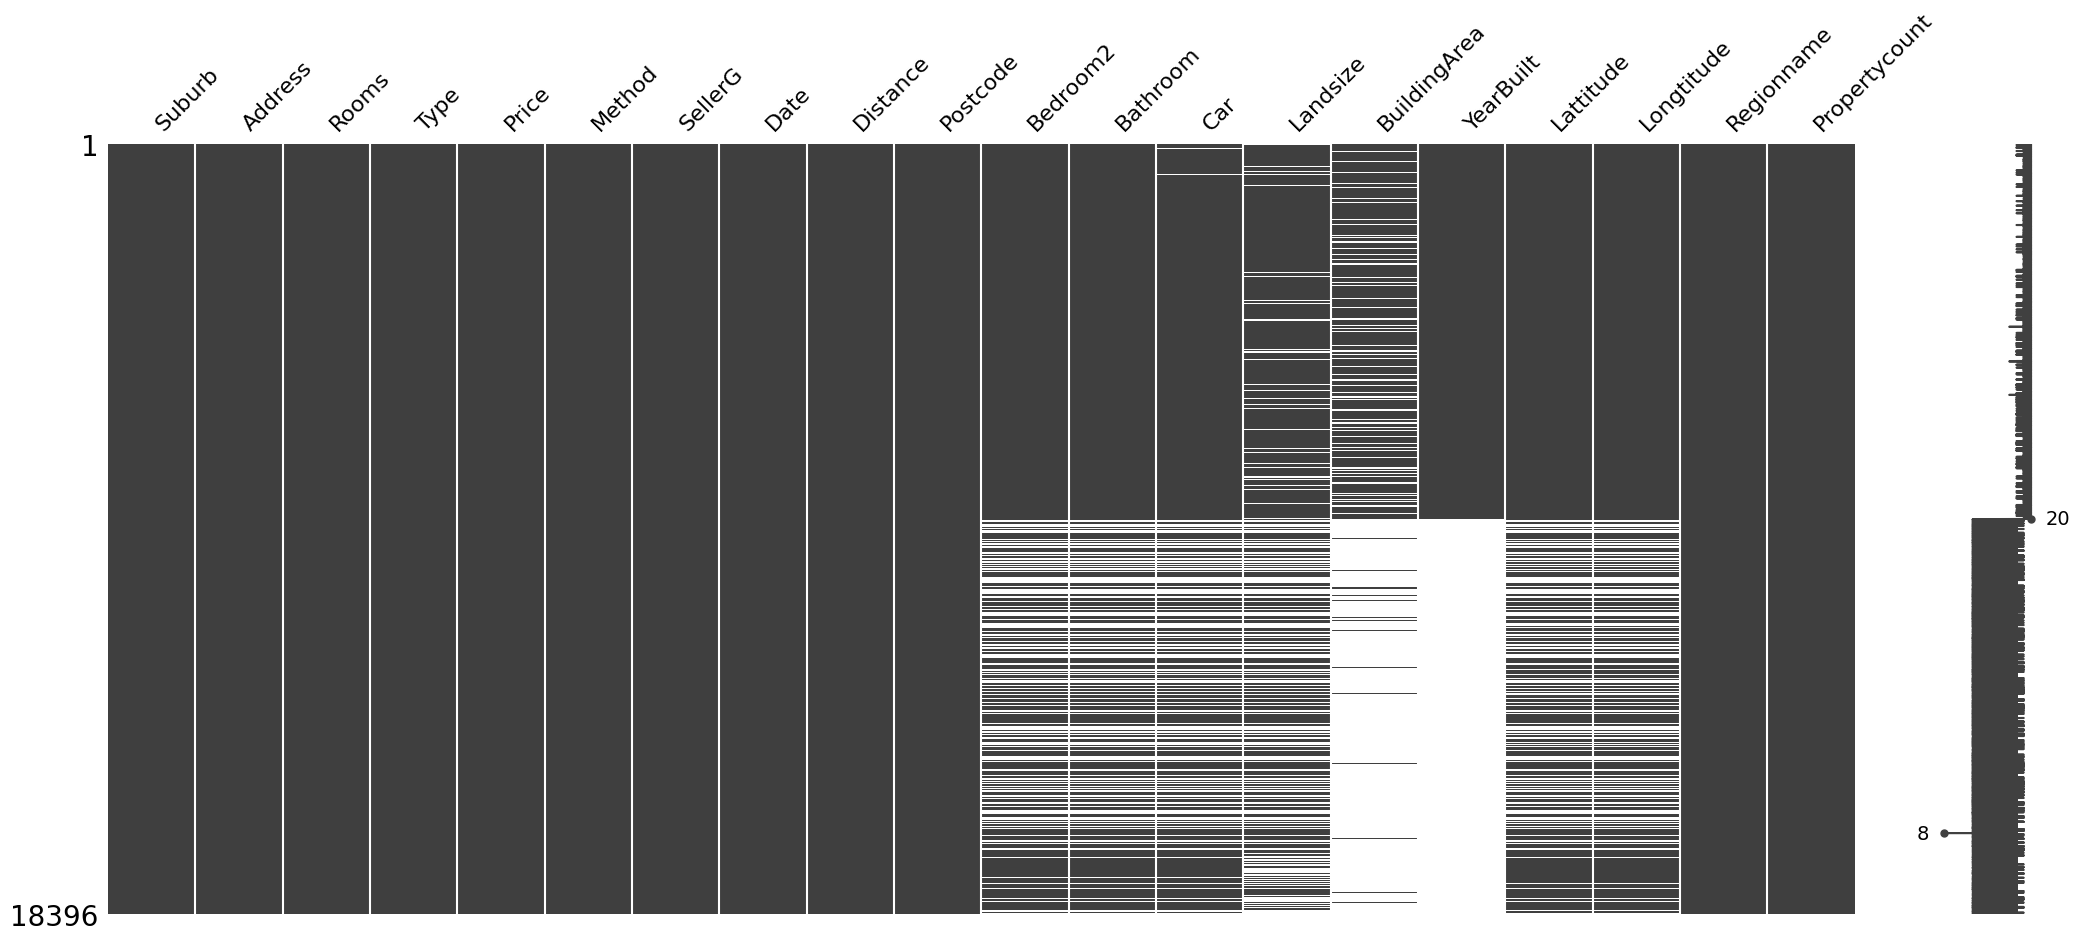

In [ ]:
missingno.matrix(df.sort_values("YearBuilt"))

Eliminando columnas con % de nulos mayor a 30%

In [ ]:
array_delete = ['BuildingArea','YearBuilt']
df.drop(columns = array_delete, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18396 non-null  object 
 1   Address        18396 non-null  object 
 2   Rooms          18396 non-null  int64  
 3   Type           18396 non-null  object 
 4   Price          18396 non-null  float64
 5   Method         18396 non-null  object 
 6   SellerG        18396 non-null  object 
 7   Date           18396 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  Lattitude      15064 non-null  float64
 15  Longtitude     15064 non-null  float64
 16  Regionname     18395 non-null  object 
 17  Propertycount  18395 non-null  float64
dtypes: flo

Eliminando registro de columnas con 1 registro nulo

In [ ]:
df.dropna(subset=['Distance'], inplace=True)
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18395 entries, 0 to 18394
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18395 non-null  object 
 1   Address        18395 non-null  object 
 2   Rooms          18395 non-null  int64  
 3   Type           18395 non-null  object 
 4   Price          18395 non-null  float64
 5   Method         18395 non-null  object 
 6   SellerG        18395 non-null  object 
 7   Date           18395 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Bedroom2       14927 non-null  float64
 11  Bathroom       14925 non-null  float64
 12  Car            14820 non-null  float64
 13  Landsize       13603 non-null  float64
 14  Lattitude      15064 non-null  float64
 15  Longtitude     15064 non-null  float64
 16  Regionname     18395 non-null  object 
 17  Propertycount  18395 non-null  float64
dtypes: flo

Se observa que los valores faltantes son del tipo MAR.

In [ ]:
def show_distr(df):
  print("missing values : \n{}".format(df.isna().sum()))
  boxplot = df.boxplot(column=na_variables)
  hist = df[na_variables].hist(bins=20)
  print("\n -------------------------")

In [ ]:
na_variables = ['Longtitude', 'Lattitude', 'Bathroom','Bedroom2','Car','Landsize']
na_variables

['Longtitude', 'Lattitude', 'Bathroom', 'Bedroom2', 'Car', 'Landsize']

missing values : 
Longtitude    3331
Lattitude     3331
Bathroom      3470
Bedroom2      3468
Car           3575
Landsize      4792
dtype: int64

 -------------------------


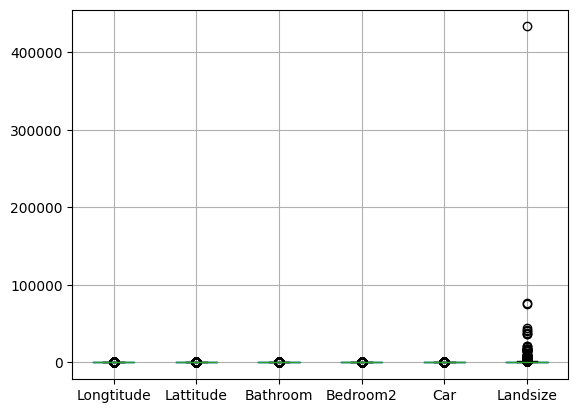

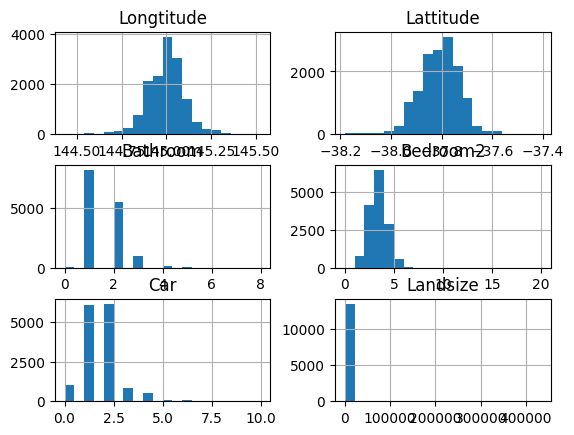

In [ ]:
show_distr(df[na_variables])

Imputacion basada en estadistica

In [ ]:
for column in na_variables:
    df[column].plot.box(figsize=(8,4))
    plt.show()

In [ ]:
salida = [df[na_variables].mean(), df[na_variables].median(), df[na_variables].quantile(0.25), df[na_variables].quantile(0.75)]
result = pd.concat(salida, axis = 1)
result.columns = ["mean", "median", "Q1", "Q3"]
result

Usando la Media

In [ ]:
df.info()


In [ ]:
# prompt: df quitar las variables no numericas

df = df.select_dtypes(include=np.number)

In [ ]:
df_imp = df.fillna(df.median())
show_distr(df_imp[na_variables])

Usando Quartil 1

In [ ]:
df_imp = df.fillna(df.quantile(0.25))
show_distr(df_imp[na_variables])

Con sklearn

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
df_imp = imputer.fit_transform(df[na_variables])
df_imp = pd.DataFrame(df_imp, columns = na_variables)
show_distr(df_imp)

In [ ]:
imputer = SimpleImputer(strategy="median")
df_imp = imputer.fit_transform(df[na_variables])
df_imp = pd.DataFrame(df_imp, columns = na_variables)
show_distr(df_imp)

### **Imputación de datos con KNNImputer**

In [ ]:
from sklearn.impute import KNNImputer

missing values : 
Longtitude    0
Lattitude     0
Bathroom      0
Bedroom2      0
Car           0
Landsize      0
dtype: int64

 -------------------------


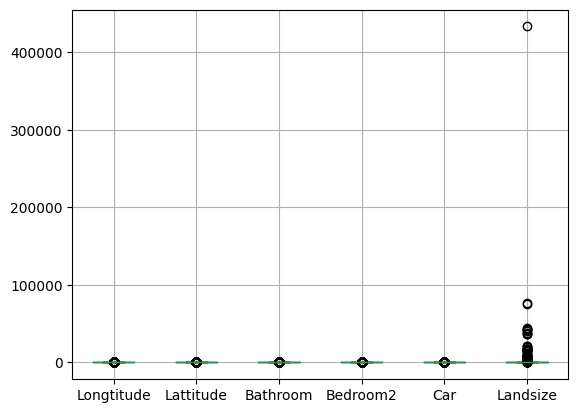

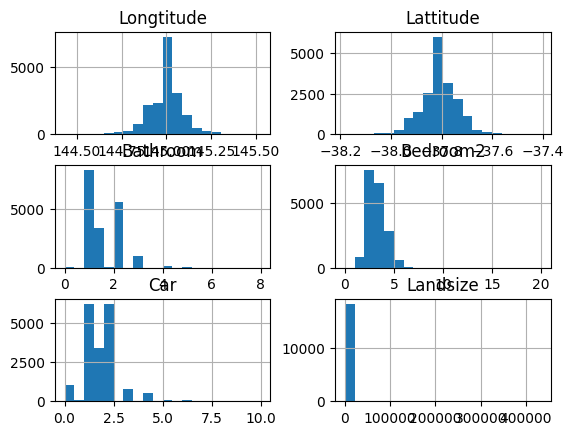

In [ ]:
imputer_knn = KNNImputer(n_neighbors=10, weights="uniform")
df_imp = imputer_knn.fit_transform(df[na_variables])
df_imp = pd.DataFrame(df_imp, columns = na_variables)
show_distr(df_imp)

In [ ]:
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18395 entries, 0 to 18394
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Longtitude  18395 non-null  float64
 1   Lattitude   18395 non-null  float64
 2   Bathroom    18395 non-null  float64
 3   Bedroom2    18395 non-null  float64
 4   Car         18395 non-null  float64
 5   Landsize    18395 non-null  float64
dtypes: float64(6)
memory usage: 862.4 KB


In [ ]:
# Eliminar columnas que tengan al menos un valor nulo
df_sin_nulos = df.dropna(axis=1, how='any')
df_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18395 entries, 0 to 18394
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18395 non-null  object 
 1   Address        18395 non-null  object 
 2   Rooms          18395 non-null  int64  
 3   Type           18395 non-null  object 
 4   Price          18395 non-null  float64
 5   Method         18395 non-null  object 
 6   SellerG        18395 non-null  object 
 7   Date           18395 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Regionname     18395 non-null  object 
 11  Propertycount  18395 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.7+ MB


In [ ]:
df_knn_imp = pd.concat([df_sin_nulos, df_imp], axis=1)
df_knn_imp.reset_index(drop=True, inplace=True)
df_knn_imp.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Regionname,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,Northern Metropolitan,4019.0,144.9984,-37.7996,1.0,2.0,1.0,202.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,Northern Metropolitan,4019.0,144.9934,-37.8079,1.0,2.0,0.0,156.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,Northern Metropolitan,4019.0,144.9944,-37.8093,2.0,3.0,0.0,134.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,Northern Metropolitan,4019.0,144.9969,-37.7969,2.0,3.0,1.0,94.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,Northern Metropolitan,4019.0,144.9941,-37.8072,1.0,3.0,2.0,120.0


In [ ]:
df_knn_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18395 entries, 0 to 18394
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18395 non-null  object 
 1   Address        18395 non-null  object 
 2   Rooms          18395 non-null  int64  
 3   Type           18395 non-null  object 
 4   Price          18395 non-null  float64
 5   Method         18395 non-null  object 
 6   SellerG        18395 non-null  object 
 7   Date           18395 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Regionname     18395 non-null  object 
 11  Propertycount  18395 non-null  float64
 12  Longtitude     18395 non-null  float64
 13  Lattitude      18395 non-null  float64
 14  Bathroom       18395 non-null  float64
 15  Bedroom2       18395 non-null  float64
 16  Car            18395 non-null  float64
 17  Landsize       18395 non-null  float64
dtypes: flo

El dataframe df_knn_imp sería el resultado de la imputación de datos con el método KNN Imputer.

### **Imputación con Iterative Imputer**

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Copy the data
df_ii_missing = df[na_variables].copy(deep=True)

# Init
ii_imp = IterativeImputer(
    estimator=ExtraTreesRegressor(), max_iter=10, random_state=123, verbose=3
)

# Tranform
df_ii_missing.loc[:, :] = ii_imp.fit_transform(df_ii_missing)

[IterativeImputer] Completing matrix with shape (18395, 6)
[IterativeImputer] Ending imputation round 1/10, elapsed time 15.85
[IterativeImputer] Change: 12168.393628611337, scaled tolerance: 433.014 
[IterativeImputer] Ending imputation round 2/10, elapsed time 31.97
[IterativeImputer] Change: 4537.78, scaled tolerance: 433.014 
[IterativeImputer] Ending imputation round 3/10, elapsed time 48.51
[IterativeImputer] Change: 5101.59, scaled tolerance: 433.014 
[IterativeImputer] Ending imputation round 4/10, elapsed time 64.97
[IterativeImputer] Change: 8224.5, scaled tolerance: 433.014 
[IterativeImputer] Ending imputation round 5/10, elapsed time 80.91
[IterativeImputer] Change: 4623.241827899999, scaled tolerance: 433.014 
[IterativeImputer] Ending imputation round 6/10, elapsed time 102.90
[IterativeImputer] Change: 8930.17, scaled tolerance: 433.014 
[IterativeImputer] Ending imputation round 7/10, elapsed time 125.82
[IterativeImputer] Change: 8908.71, scaled tolerance: 433.014 
[I

missing values : 
Longtitude    0
Lattitude     0
Bathroom      0
Bedroom2      0
Car           0
Landsize      0
dtype: int64

 -------------------------


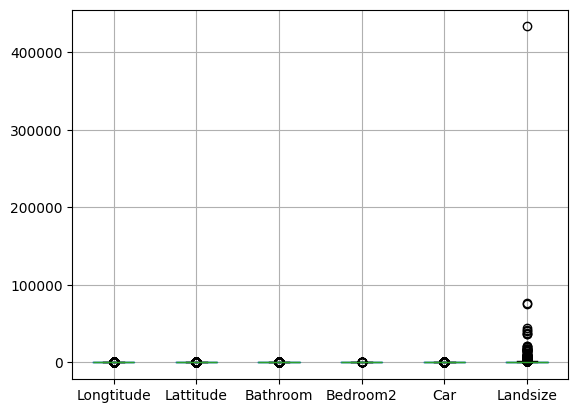

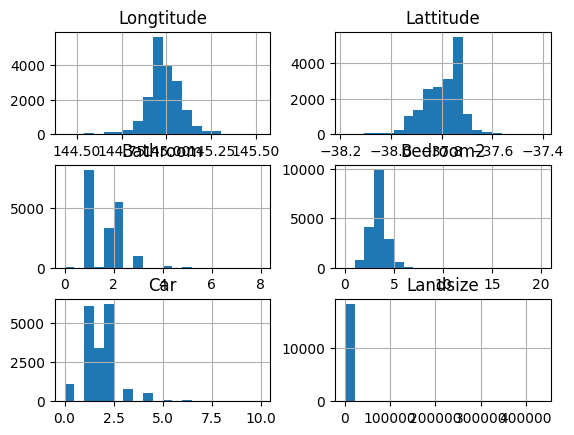

In [ ]:
show_distr(df_ii_missing)

In [ ]:
df_ii_imp = pd.concat([df_sin_nulos, df_ii_missing], axis=1)
df_ii_imp.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Regionname,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,Northern Metropolitan,4019.0,144.9984,-37.7996,1.0,2.0,1.0,202.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,Northern Metropolitan,4019.0,144.9934,-37.8079,1.0,2.0,0.0,156.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,Northern Metropolitan,4019.0,144.9944,-37.8093,2.0,3.0,0.0,134.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,Northern Metropolitan,4019.0,144.9969,-37.7969,2.0,3.0,1.0,94.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,Northern Metropolitan,4019.0,144.9941,-37.8072,1.0,3.0,2.0,120.0


In [ ]:
df_ii_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18395 entries, 0 to 18394
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18395 non-null  object 
 1   Address        18395 non-null  object 
 2   Rooms          18395 non-null  int64  
 3   Type           18395 non-null  object 
 4   Price          18395 non-null  float64
 5   Method         18395 non-null  object 
 6   SellerG        18395 non-null  object 
 7   Date           18395 non-null  object 
 8   Distance       18395 non-null  float64
 9   Postcode       18395 non-null  float64
 10  Regionname     18395 non-null  object 
 11  Propertycount  18395 non-null  float64
 12  Longtitude     18395 non-null  float64
 13  Lattitude      18395 non-null  float64
 14  Bathroom       18395 non-null  float64
 15  Bedroom2       18395 non-null  float64
 16  Car            18395 non-null  float64
 17  Landsize       18395 non-null  float64
dtypes: flo

El dataframe df_ii_imp sería el resultado de la imputación de datos con el método Iterative Imputer.

## **Tratamiento de Outliers**

### Para el modelo de imputación con KNN

In [ ]:
df_knn_imp.describe()

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
count,18395.000000,1.839500e+04,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000
mean,2.935091,1.056716e+06,10.389986,3107.140147,7517.975265,144.996347,-37.809852,1.537579,2.909876,1.611751,557.451061
std,0.958203,6.419340e+05,6.009050,95.000995,4488.416599,0.096281,0.073443,0.621622,0.871341,0.860369,3459.729997
min,1.000000,8.500000e+04,0.000000,3000.000000,249.000000,144.431810,-38.182550,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.330000e+05,6.300000,3046.000000,4294.000000,144.950870,-37.845400,1.000000,2.000000,1.000000,238.500000
50%,3.000000,8.800000e+05,9.700000,3085.000000,6567.000000,144.996338,-37.809849,1.538492,3.000000,1.615520,557.000000
75%,3.000000,1.302000e+06,13.300000,3149.000000,10331.000000,145.046995,-37.767400,2.000000,3.000000,2.000000,610.000000
max,12.000000,9.000000e+06,48.100000,3978.000000,21650.000000,145.526350,-37.408530,8.000000,20.000000,10.000000,433014.000000


Análisis de distribución de variables numéricas

In [ ]:
def analisisNumericas(df, variable):
  print(" "*20,"Histograma"," "*20)
  df[variable].plot.hist(bins=25,figsize=(8,4))
  plt.title(f'{variable} \n',fontdict={'fontsize':16})
  plt.show()
  print("\n")
  print(" "*20,"Boxplot"," "*20)
  df[variable].plot.box(figsize=(8,4))
  plt.show()

#################### Rooms ####################
                     Histograma                     


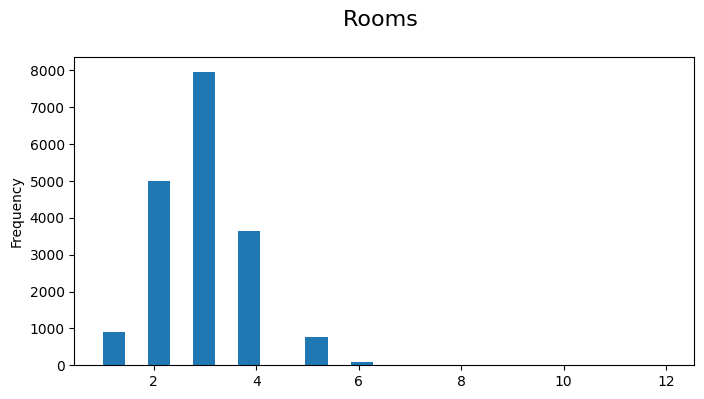



                     Boxplot                     


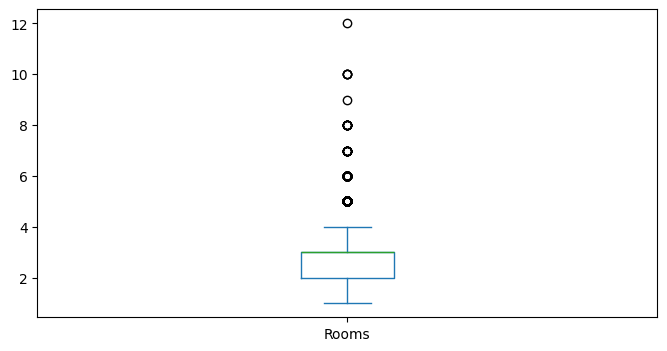




#################### Price ####################
                     Histograma                     


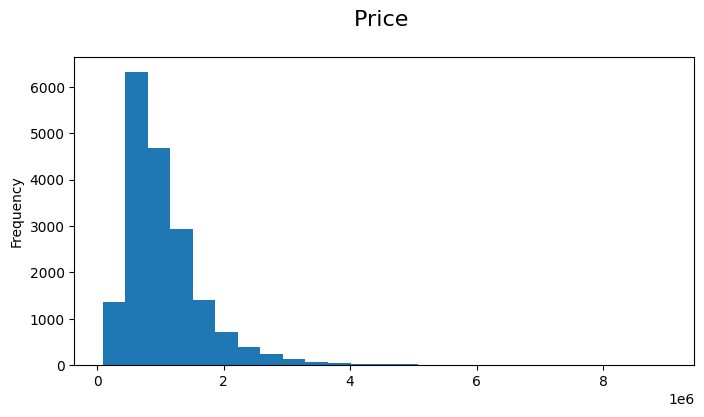



                     Boxplot                     


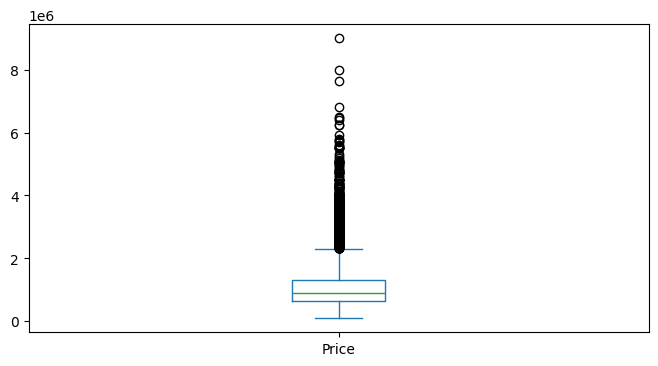




#################### Distance ####################
                     Histograma                     


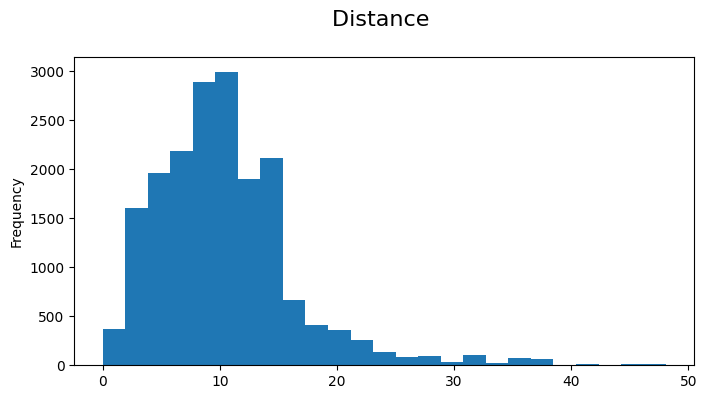



                     Boxplot                     


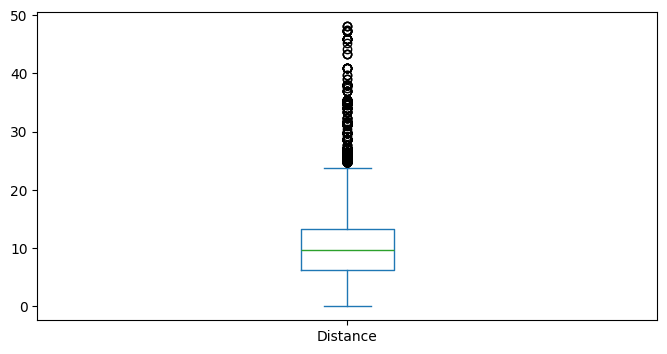




#################### Postcode ####################
                     Histograma                     


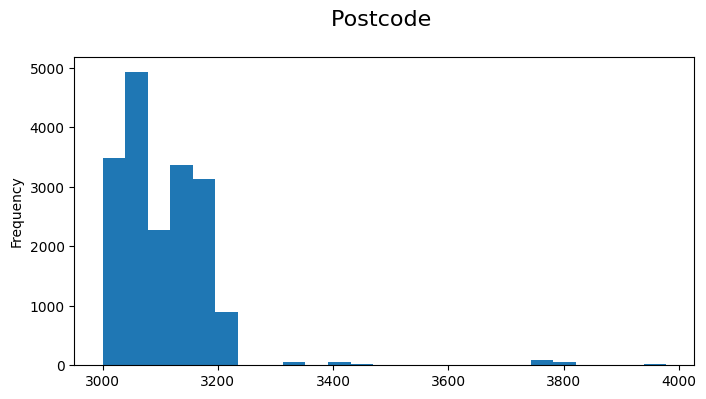



                     Boxplot                     


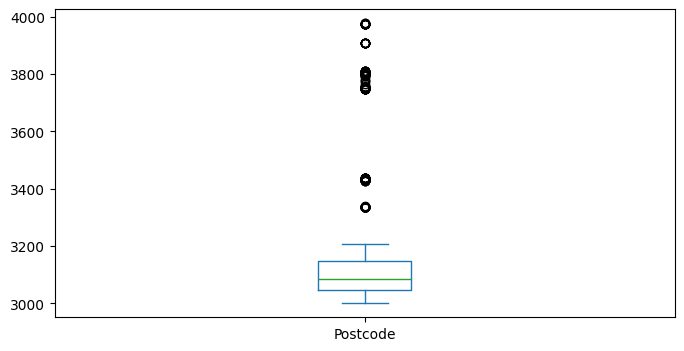




#################### Propertycount ####################
                     Histograma                     


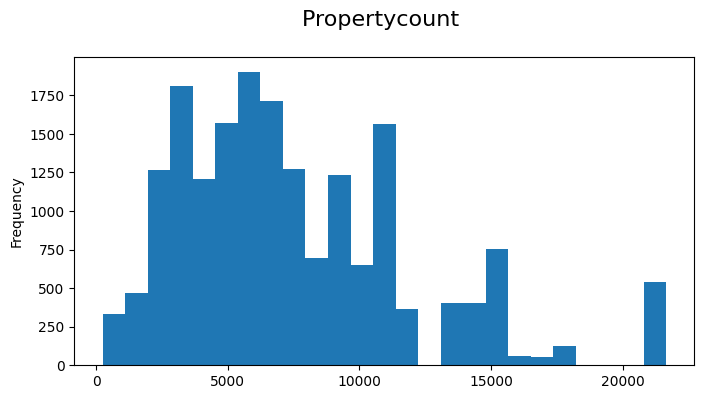



                     Boxplot                     


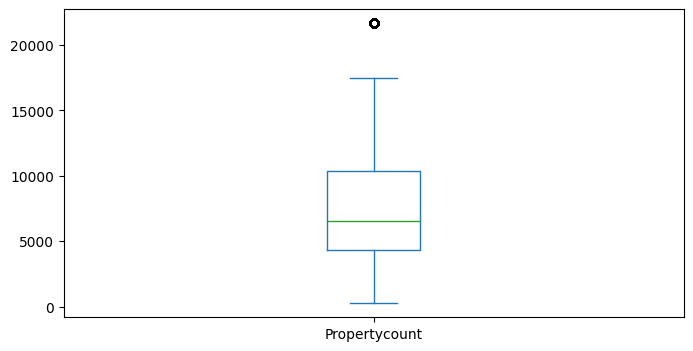




#################### Longtitude ####################
                     Histograma                     


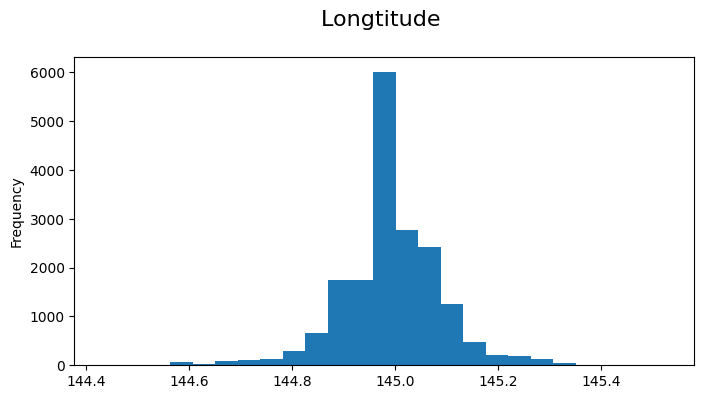



                     Boxplot                     


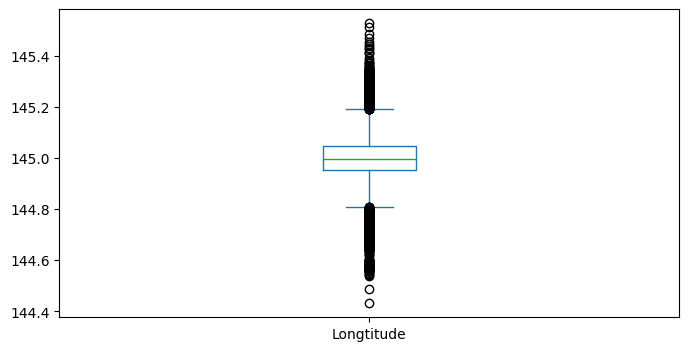




#################### Lattitude ####################
                     Histograma                     


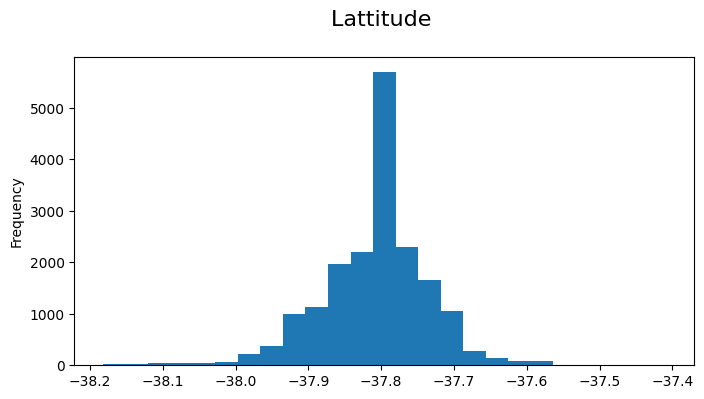



                     Boxplot                     


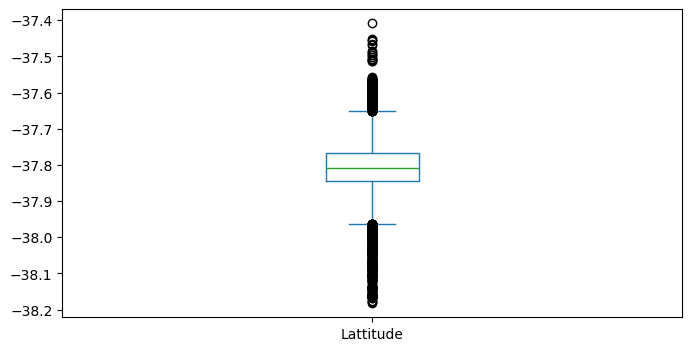




#################### Bathroom ####################
                     Histograma                     


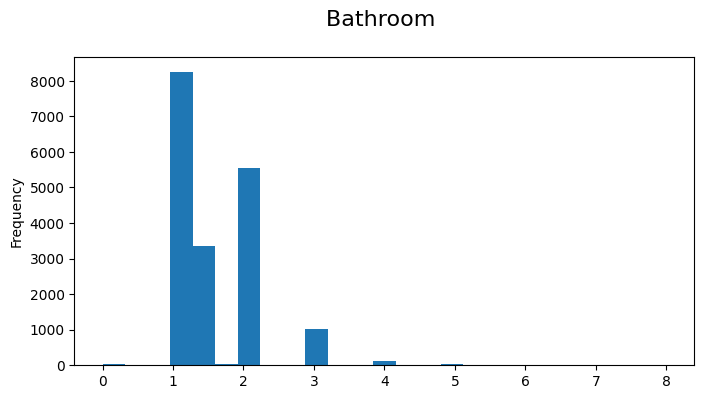



                     Boxplot                     


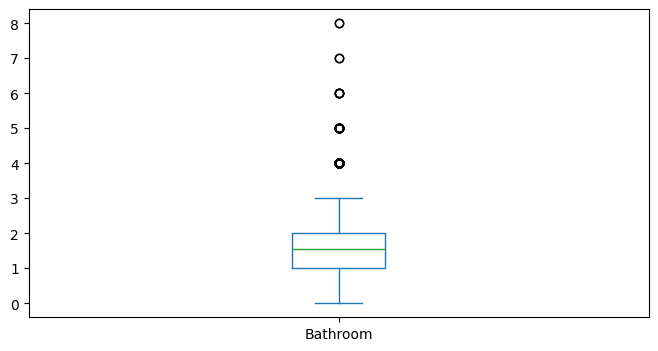




#################### Bedroom2 ####################
                     Histograma                     


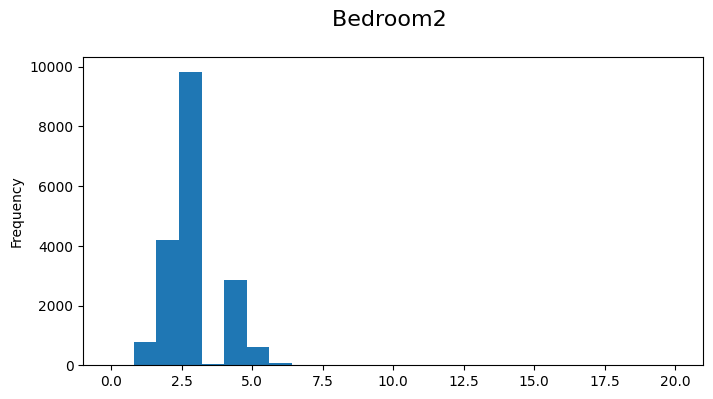



                     Boxplot                     


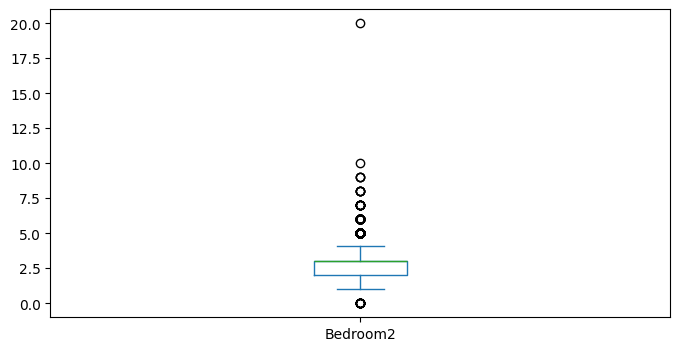




#################### Car ####################
                     Histograma                     


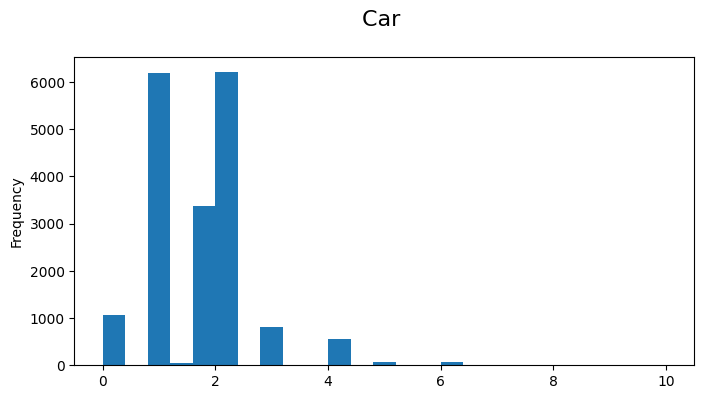



                     Boxplot                     


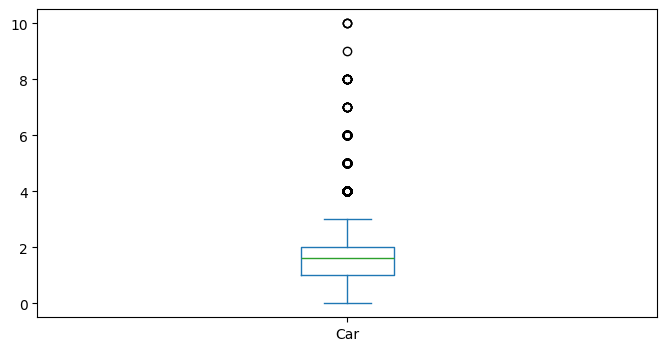




#################### Landsize ####################
                     Histograma                     


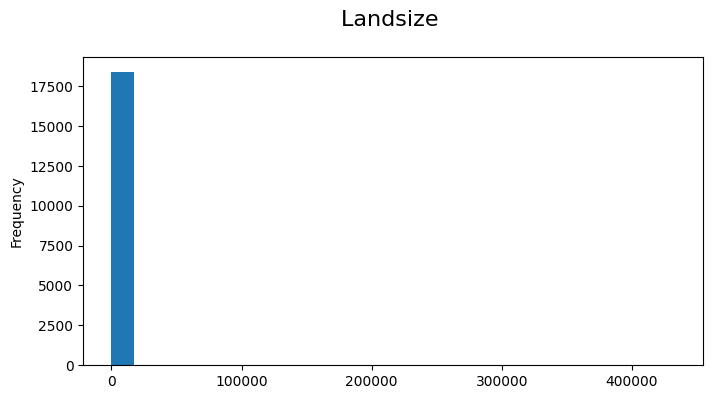



                     Boxplot                     


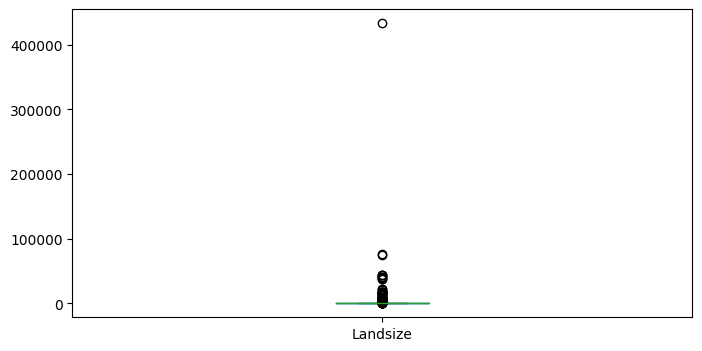

In [ ]:
for var in df_knn_imp.select_dtypes(include=['number']):
  print("#"*20,var,"#"*20)
  analisisNumericas(df_knn_imp, var)
  print("\n\n")

#### Análisis RIC univariante

In [ ]:
df_tmp = df_knn_imp.copy()
#df_tmp.drop(columns = ["Price"], inplace = True) #
#cols = df_tmp.select_dtypes(include=["number"]).drop(columns=["Price"]).columns
cols = df_tmp.select_dtypes(include=['number']).columns #
Q1 = df_tmp[cols].quantile(0.25)
Q3 = df_tmp[cols].quantile(0.75)
IQR = Q3 - Q1
condition = ~((df_tmp[cols] < (Q1 - 1.5 * IQR)) | (df_tmp[cols] > (Q3 + 1.5 * IQR))).any(axis=1)
filtered_df_ric = df_tmp[condition]

In [ ]:
filtered_df_ric.reset_index(inplace=True)
filtered_df_ric = filtered_df_ric.drop(columns=['index'])
filtered_df_ric.shape

(13976, 18)

Visualizando las nuevas distribuciones de variables numéricas luego del tratamiento de outliers.

#################### Rooms ####################
                     Histograma                     


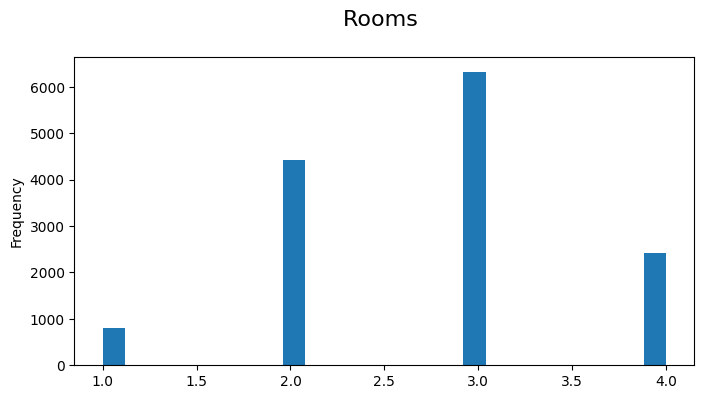



                     Boxplot                     


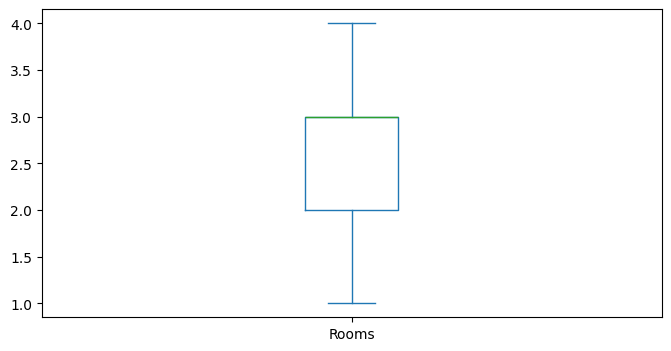




#################### Price ####################
                     Histograma                     


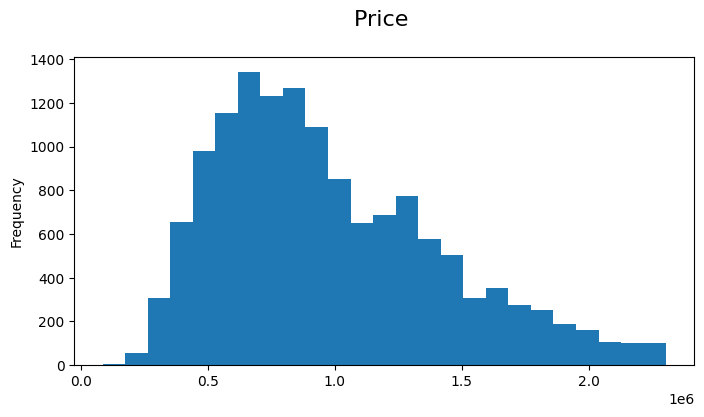



                     Boxplot                     


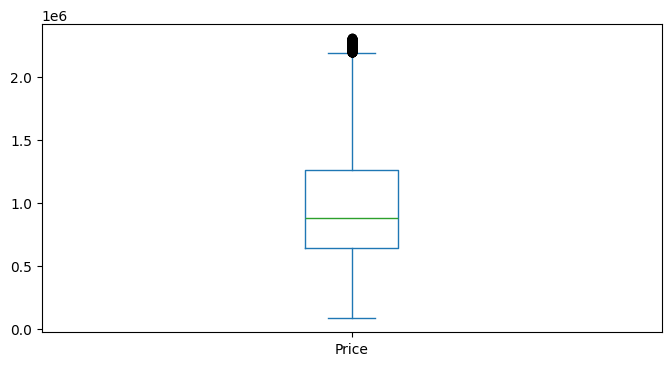




#################### Distance ####################
                     Histograma                     


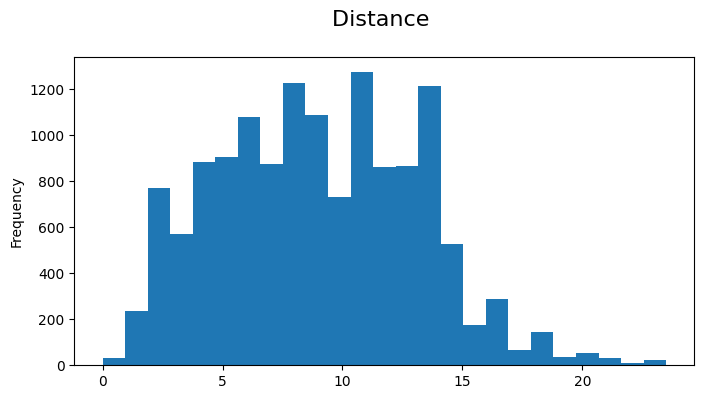



                     Boxplot                     


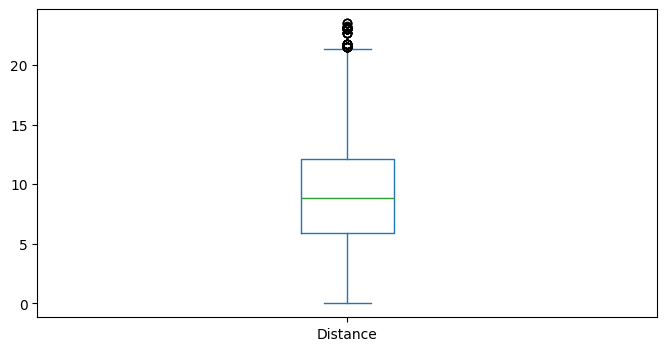




#################### Postcode ####################
                     Histograma                     


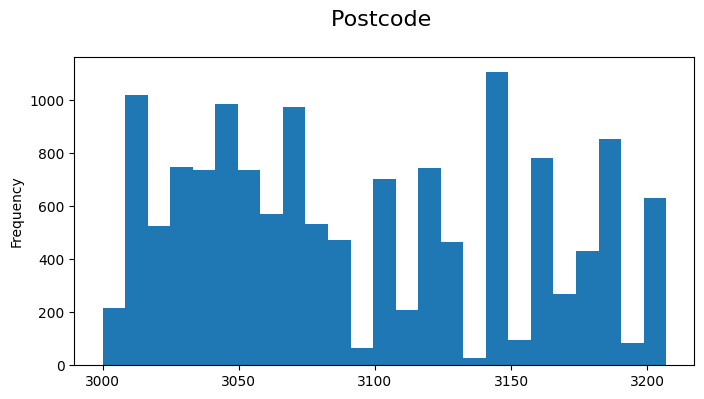



                     Boxplot                     


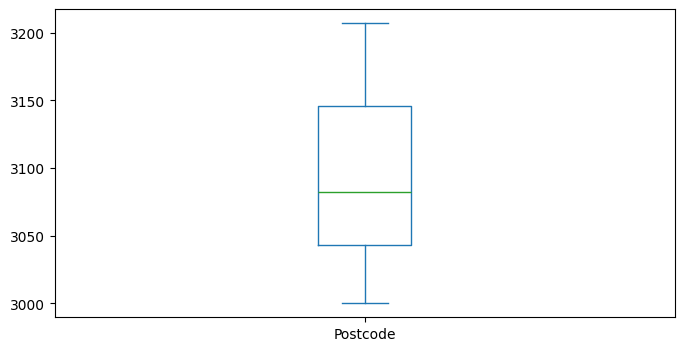




#################### Propertycount ####################
                     Histograma                     


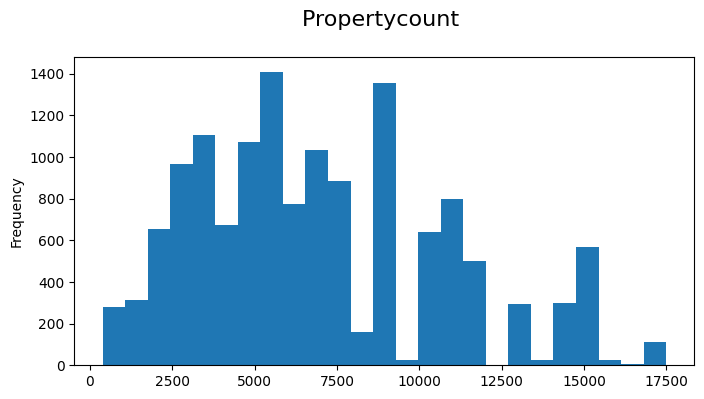



                     Boxplot                     


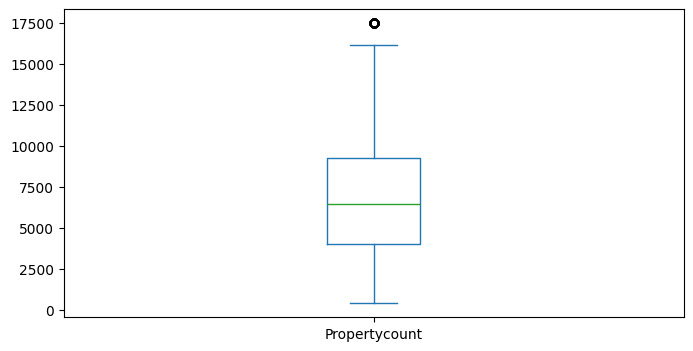




#################### Longtitude ####################
                     Histograma                     


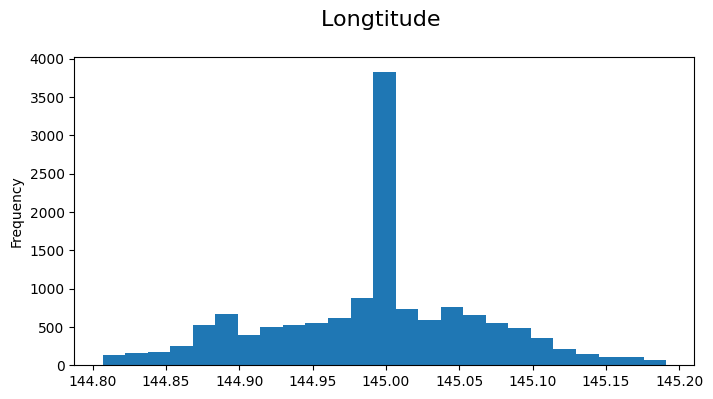



                     Boxplot                     


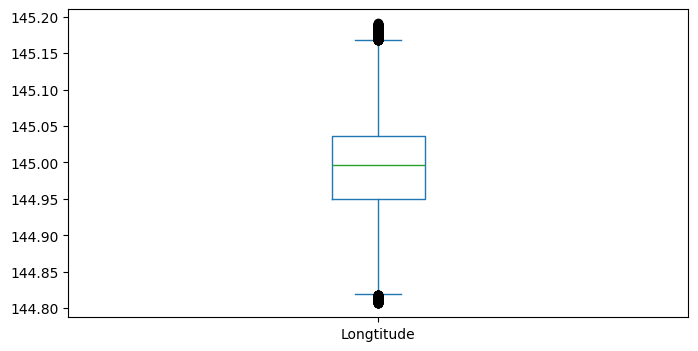




#################### Lattitude ####################
                     Histograma                     


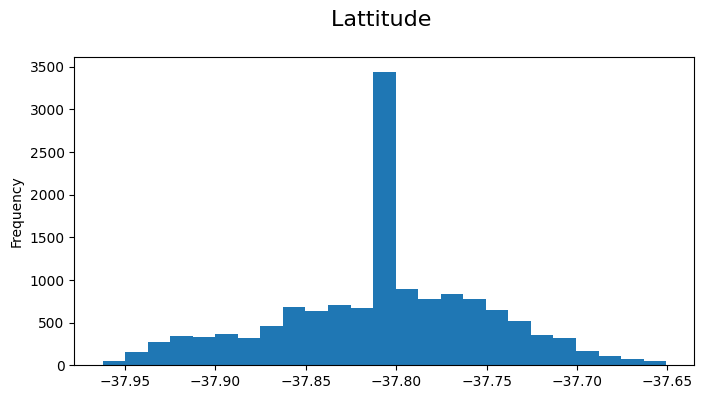



                     Boxplot                     


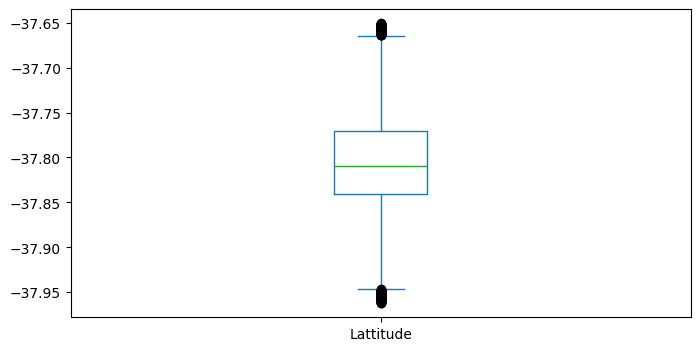




#################### Bathroom ####################
                     Histograma                     


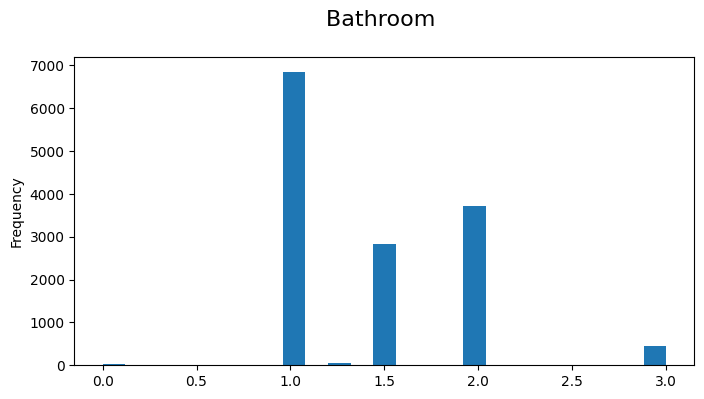



                     Boxplot                     


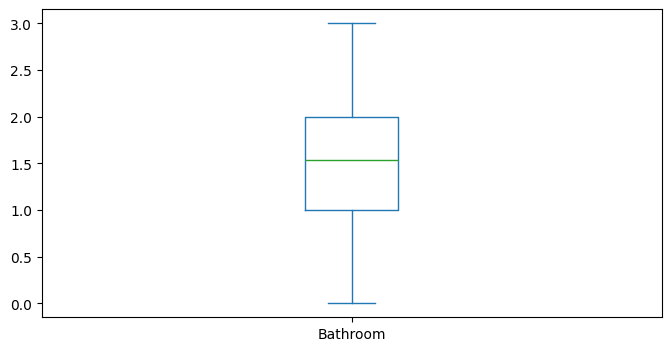




#################### Bedroom2 ####################
                     Histograma                     


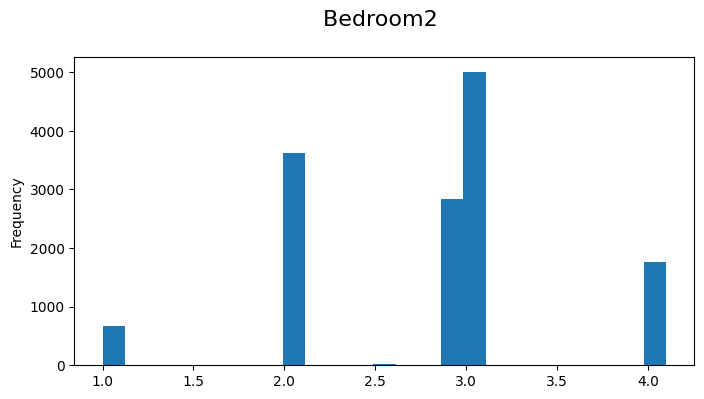



                     Boxplot                     


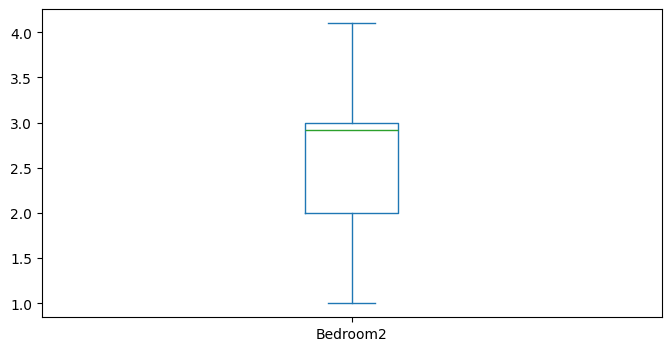




#################### Car ####################
                     Histograma                     


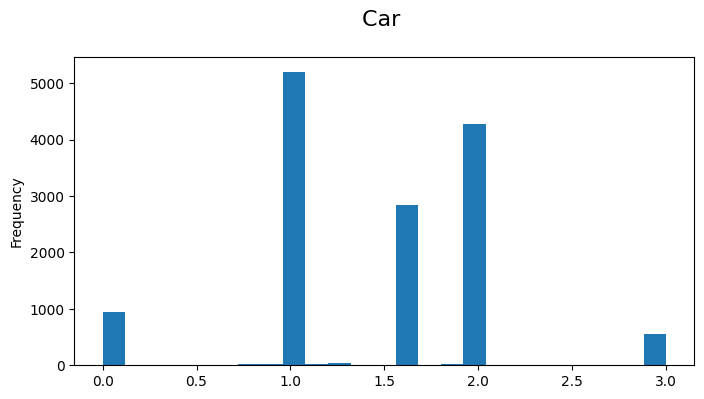



                     Boxplot                     


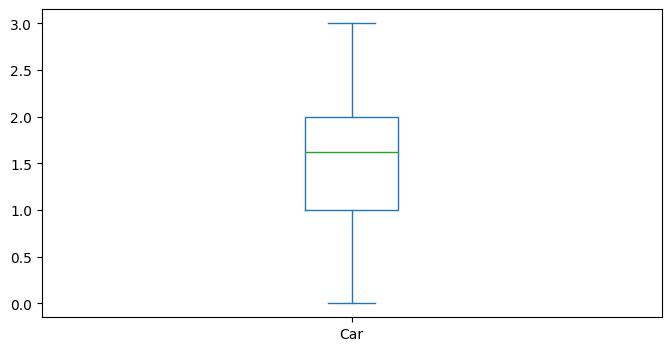




#################### Landsize ####################
                     Histograma                     


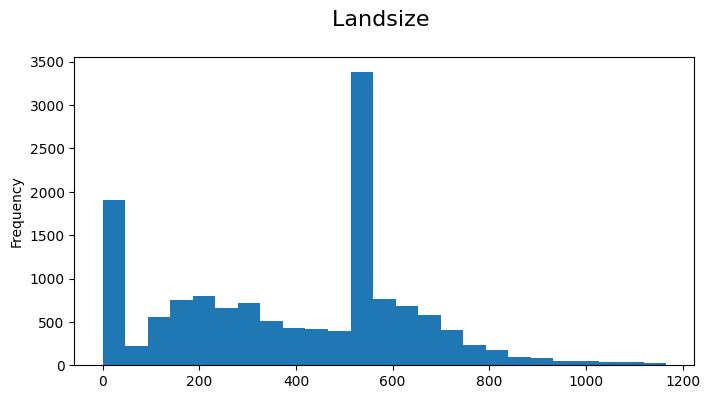



                     Boxplot                     


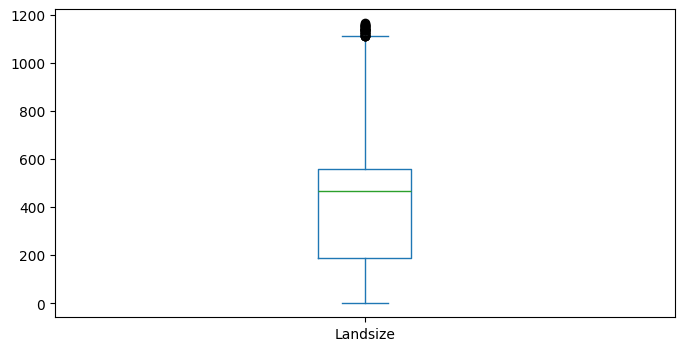

In [ ]:
for var in filtered_df_ric.select_dtypes(include=['number']).columns:
  print("#"*20,var,"#"*20)
  analisisNumericas(filtered_df_ric, var)
  print("\n\n")

In [ ]:
filtered_df_ric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13976 entries, 0 to 13975
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13976 non-null  object 
 1   Address        13976 non-null  object 
 2   Rooms          13976 non-null  int64  
 3   Type           13976 non-null  object 
 4   Price          13976 non-null  float64
 5   Method         13976 non-null  object 
 6   SellerG        13976 non-null  object 
 7   Date           13976 non-null  object 
 8   Distance       13976 non-null  float64
 9   Postcode       13976 non-null  float64
 10  Regionname     13976 non-null  object 
 11  Propertycount  13976 non-null  float64
 12  Longtitude     13976 non-null  float64
 13  Lattitude      13976 non-null  float64
 14  Bathroom       13976 non-null  float64
 15  Bedroom2       13976 non-null  float64
 16  Car            13976 non-null  float64
 17  Landsize       13976 non-null  float64
dtypes: flo

El dataframe filtered_df_ric es el resultante luego del tratamiento de outliers con el método RIC univariante.

#### Análisis PyOD KNN

In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-2.0.2-py3-none-any.whl size=198469 sha256=dedf3a3986498b86093fa8a794bba8d3d02729a3c864646ed9b7e28e18fad05d
  Stored in directory: /root/.cache/pip/wheels/77/c2/20/34d1f15b41b701ba69f42a32304825810d680754d509f91391
Successfully built pyod


In [ ]:
df_tmp2 = df_knn_imp.copy()
df_tmp2.shape

(18395, 18)

In [ ]:
from pyod.models.knn import KNN
import pandas as pd

# Identificar columnas categóricas
categorical_cols = df_tmp2.select_dtypes(include=['object']).columns

# Eliminar columnas categóricas y variable target
filtered_df_knn = df_tmp2.drop(columns=categorical_cols)
#df_tmp3.drop(columns = ["Price"], inplace = True)

clf = KNN(contamination=0.1)
clf.fit(filtered_df_knn)
y_pred = clf.predict(filtered_df_knn)
filtered_df_knn[y_pred == 0].shape

(16914, 11)

In [ ]:
filtered_df_knn[y_pred == 0]

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
0,2,1480000.0,2.5,3067.0,4019.0,144.99840,-37.79960,1.0,2.0,1.0,202.0
1,2,1035000.0,2.5,3067.0,4019.0,144.99340,-37.80790,1.0,2.0,0.0,156.0
2,3,1465000.0,2.5,3067.0,4019.0,144.99440,-37.80930,2.0,3.0,0.0,134.0
3,3,850000.0,2.5,3067.0,4019.0,144.99690,-37.79690,2.0,3.0,1.0,94.0
4,4,1600000.0,2.5,3067.0,4019.0,144.99410,-37.80720,1.0,3.0,2.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...
18390,2,622500.0,6.8,3016.0,6380.0,144.90484,-37.86393,2.0,2.0,1.0,255.5
18391,4,2500000.0,6.8,3016.0,6380.0,144.89299,-37.85908,1.0,4.0,5.0,866.0
18392,4,1100000.0,12.7,3085.0,1369.0,145.10547,-37.72006,3.0,4.0,2.0,706.5
18393,4,1285000.0,6.3,3013.0,6543.0,144.88449,-37.81188,1.0,4.0,1.0,362.0


#### Análisis PyOD ABOD

In [ ]:
from pyod.models.abod import ABOD
from pyod.models.knn import KNN

In [ ]:
# Identificar columnas categóricas
categorical_cols = df_tmp2.select_dtypes(include=['object']).columns

# Eliminar columnas categóricas y variable target
filtered_df_abod = df_tmp2.drop(columns=categorical_cols)
#df_tmp3.drop(columns = ["Price"], inplace = True)

clf = ABOD(contamination=0.1)
clf.fit(filtered_df_abod)
y_pred = clf.predict(filtered_df_abod)
filtered_df_abod[y_pred == 0].shape

(16381, 11)

In [ ]:
filtered_df_abod[y_pred == 0]

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
0,2,1480000.0,2.5,3067.0,4019.0,144.99840,-37.79960,1.0,2.0,1.0,202.0
1,2,1035000.0,2.5,3067.0,4019.0,144.99340,-37.80790,1.0,2.0,0.0,156.0
3,3,850000.0,2.5,3067.0,4019.0,144.99690,-37.79690,2.0,3.0,1.0,94.0
4,4,1600000.0,2.5,3067.0,4019.0,144.99410,-37.80720,1.0,3.0,2.0,120.0
6,3,1876000.0,2.5,3067.0,4019.0,144.99930,-37.80240,2.0,4.0,0.0,245.0
...,...,...,...,...,...,...,...,...,...,...,...
18390,2,622500.0,6.8,3016.0,6380.0,144.90484,-37.86393,2.0,2.0,1.0,255.5
18391,4,2500000.0,6.8,3016.0,6380.0,144.89299,-37.85908,1.0,4.0,5.0,866.0
18392,4,1100000.0,12.7,3085.0,1369.0,145.10547,-37.72006,3.0,4.0,2.0,706.5
18393,4,1285000.0,6.3,3013.0,6543.0,144.88449,-37.81188,1.0,4.0,1.0,362.0


#### Análisis PyOD CBLOF

In [ ]:
from pyod.models.cblof import CBLOF

In [ ]:
# Identificar columnas categóricas
categorical_cols = df_tmp2.select_dtypes(include=['object']).columns

# Eliminar columnas categóricas y variable target
filtered_df_cblof = df_tmp2.drop(columns=categorical_cols)
#df_tmp3.drop(columns = ["Price"], inplace = True)

clf = CBLOF(contamination=0.1, random_state=42)
clf.fit(filtered_df_cblof)
y_pred = clf.predict(filtered_df_cblof)
filtered_df_cblof[y_pred == 0].shape

(16555, 11)

In [ ]:
filtered_df_cblof[y_pred == 0]

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
0,2,1480000.0,2.5,3067.0,4019.0,144.99840,-37.79960,1.0,2.0,1.0,202.0
1,2,1035000.0,2.5,3067.0,4019.0,144.99340,-37.80790,1.0,2.0,0.0,156.0
2,3,1465000.0,2.5,3067.0,4019.0,144.99440,-37.80930,2.0,3.0,0.0,134.0
3,3,850000.0,2.5,3067.0,4019.0,144.99690,-37.79690,2.0,3.0,1.0,94.0
4,4,1600000.0,2.5,3067.0,4019.0,144.99410,-37.80720,1.0,3.0,2.0,120.0
...,...,...,...,...,...,...,...,...,...,...,...
18389,3,1170000.0,6.8,3016.0,6380.0,144.88738,-37.85274,2.0,3.0,4.0,436.0
18390,2,622500.0,6.8,3016.0,6380.0,144.90484,-37.86393,2.0,2.0,1.0,255.5
18392,4,1100000.0,12.7,3085.0,1369.0,145.10547,-37.72006,3.0,4.0,2.0,706.5
18393,4,1285000.0,6.3,3013.0,6543.0,144.88449,-37.81188,1.0,4.0,1.0,362.0


## **Entrenamiento del modelo**

### Para modelo RIC

In [ ]:
filtered_df_ric['Date'] = pd.to_datetime(filtered_df_ric['Date'], format='%d/%m/%Y')
filtered_df_ric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13976 entries, 0 to 13975
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13976 non-null  object        
 1   Address        13976 non-null  object        
 2   Rooms          13976 non-null  int64         
 3   Type           13976 non-null  object        
 4   Price          13976 non-null  float64       
 5   Method         13976 non-null  object        
 6   SellerG        13976 non-null  object        
 7   Date           13976 non-null  datetime64[ns]
 8   Distance       13976 non-null  float64       
 9   Postcode       13976 non-null  float64       
 10  Regionname     13976 non-null  object        
 11  Propertycount  13976 non-null  float64       
 12  Longtitude     13976 non-null  float64       
 13  Lattitude      13976 non-null  float64       
 14  Bathroom       13976 non-null  float64       
 15  Bedroom2       1397

In [ ]:
tab_r = filtered_df_ric.corr(numeric_only=True)
tab_r

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
Rooms,1.000000,0.533040,0.350663,-0.042338,-0.135428,0.070977,0.072840,0.450501,0.851082,0.355442,0.399587
Price,0.533040,1.000000,-0.066541,0.275570,0.023481,0.215305,-0.216728,0.336178,0.457555,0.199363,0.259438
Distance,0.350663,-0.066541,1.000000,0.148734,-0.236745,0.268316,-0.023253,0.124493,0.315378,0.306247,0.414222
Postcode,-0.042338,0.275570,0.148734,1.000000,0.150843,0.563077,-0.624050,0.065936,-0.052008,0.015824,-0.021051
Propertycount,-0.135428,0.023481,-0.236745,0.150843,1.000000,0.127065,-0.078815,-0.032297,-0.108266,-0.065080,-0.111738
Longtitude,0.070977,0.215305,0.268316,0.563077,0.127065,1.000000,-0.317008,0.123392,0.087127,0.119373,0.157584
Lattitude,0.072840,-0.216728,-0.023253,-0.624050,-0.078815,-0.317008,1.000000,-0.061650,0.082841,0.001787,0.099767
Bathroom,0.450501,0.336178,0.124493,0.065936,-0.032297,0.123392,-0.061650,1.000000,0.504286,0.316855,0.132747
Bedroom2,0.851082,0.457555,0.315378,-0.052008,-0.108266,0.087127,0.082841,0.504286,1.000000,0.406868,0.461598
Car,0.355442,0.199363,0.306247,0.015824,-0.065080,0.119373,0.001787,0.316855,0.406868,1.000000,0.366930


In [ ]:
tab_k = filtered_df_ric.corr(numeric_only=True,method='kendall')
tab_k

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
Rooms,1.000000,0.448509,0.276675,-0.021925,-0.093201,0.061636,0.075430,0.396904,0.763098,0.339198,0.330464
Price,0.448509,1.000000,-0.026375,0.175547,0.024696,0.142135,-0.126880,0.254172,0.376702,0.195286,0.188013
Distance,0.276675,-0.026375,1.000000,0.130651,-0.168259,0.205816,0.005521,0.105447,0.218376,0.235091,0.307732
Postcode,-0.021925,0.175547,0.130651,1.000000,0.110018,0.455485,-0.406781,0.055750,-0.032598,0.025515,0.011130
Propertycount,-0.093201,0.024696,-0.168259,0.110018,1.000000,0.064577,-0.074014,-0.019345,-0.071937,-0.047657,-0.084113
Longtitude,0.061636,0.142135,0.205816,0.455485,0.064577,1.000000,-0.267712,0.103019,0.068348,0.130469,0.129293
Lattitude,0.075430,-0.126880,0.005521,-0.406781,-0.074014,-0.267712,1.000000,-0.054137,0.102464,0.010073,0.075334
Bathroom,0.396904,0.254172,0.105447,0.055750,-0.019345,0.103019,-0.054137,1.000000,0.405802,0.329944,0.112865
Bedroom2,0.763098,0.376702,0.218376,-0.032598,-0.071937,0.068348,0.102464,0.405802,1.000000,0.386226,0.301809
Car,0.339198,0.195286,0.235091,0.025515,-0.047657,0.130469,0.010073,0.329944,0.386226,1.000000,0.290274


In [ ]:
tab_s = filtered_df_ric.corr(numeric_only=True,method='spearman')
tab_s

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
Rooms,1.000000,0.558981,0.357627,-0.029434,-0.121403,0.080370,0.096534,0.449344,0.822989,0.395063,0.408153
Price,0.558981,1.000000,-0.037821,0.261037,0.036013,0.212429,-0.185990,0.329713,0.488907,0.258415,0.268994
Distance,0.357627,-0.037821,1.000000,0.169808,-0.242103,0.307945,-0.003756,0.137508,0.293270,0.312949,0.436811
Postcode,-0.029434,0.261037,0.169808,1.000000,0.169546,0.620192,-0.581530,0.072696,-0.044144,0.034420,0.011922
Propertycount,-0.121403,0.036013,-0.242103,0.169546,1.000000,0.091386,-0.111001,-0.025491,-0.096840,-0.063624,-0.122036
Longtitude,0.080370,0.212429,0.307945,0.620192,0.091386,1.000000,-0.363051,0.123232,0.085481,0.157029,0.185199
Lattitude,0.096534,-0.185990,-0.003756,-0.581530,-0.111001,-0.363051,1.000000,-0.066647,0.127016,0.013024,0.104693
Bathroom,0.449344,0.329713,0.137508,0.072696,-0.025491,0.123232,-0.066647,1.000000,0.440310,0.347770,0.148355
Bedroom2,0.822989,0.488907,0.293270,-0.044144,-0.096840,0.085481,0.127016,0.440310,1.000000,0.424163,0.388283
Car,0.395063,0.258415,0.312949,0.034420,-0.063624,0.157029,0.013024,0.347770,0.424163,1.000000,0.375133


In [ ]:
import statsmodels.api as sm

In [ ]:
def r2_quadratic(x, y):
    # Crear la matriz de diseño para el modelo cuadrático
    X = np.column_stack((np.ones(len(x)), x, x**2))  # Agrega el término constante y x^2
    model = sm.OLS(y, X).fit()  # Ajusta el modelo OLS
    return model.rsquared  # Retorna el R^2

In [ ]:
filtered_df_ric.corr(numeric_only=True,method=r2_quadratic)

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
Rooms,1.000000,0.285671,0.126346,0.006239,0.021156,0.007460,0.007763,0.213994,0.725656,0.126844,0.159683
Price,0.285671,1.000000,0.013294,0.077178,0.001585,0.047360,0.047468,0.116235,0.251597,0.044446,0.074889
Distance,0.126346,0.013294,1.000000,0.031181,0.082873,0.084926,0.000995,0.015607,0.103892,0.106478,0.178748
Postcode,0.006239,0.077178,0.031181,1.000000,0.046706,0.561195,0.491872,0.004708,0.005700,0.003067,0.012255
Propertycount,0.021156,0.001585,0.082873,0.046706,1.000000,0.016404,0.012726,0.001446,0.012059,0.005190,0.012591
Longtitude,0.007460,0.047360,0.084926,0.561195,0.016404,1.000000,0.101600,0.019914,0.052151,0.034418,0.051695
Lattitude,0.007763,0.047468,0.000995,0.491872,0.012726,0.101600,1.000000,0.003981,0.026065,0.021094,0.024499
Bathroom,0.213994,0.116235,0.015607,0.004708,0.001446,0.019914,0.003981,1.000000,0.257352,0.112012,0.036100
Bedroom2,0.725656,0.251597,0.103892,0.005700,0.012059,0.052151,0.026065,0.257352,1.000000,0.166776,0.219415
Car,0.126844,0.044446,0.106478,0.003067,0.005190,0.034418,0.021094,0.112012,0.166776,1.000000,0.135603


Vamos que las variables tienen mayor correlación lineal que cuadrática.

In [ ]:
X = df_without_categorical_ric.drop('Price', axis=1)
y = df_without_categorical_ric['Price']

NameError: name 'df_without_categorical_ric' is not defined

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# modelo de regresión usando random forest para medir la calidad del imputador
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=50, random_state=0, max_depth=6)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

In [ ]:
score_dataset(X_train, X_test, y_train, y_test)

174901.99412361687

In [ ]:
df_without_categorical_ric.describe()

NameError: name 'df_without_categorical_ric' is not defined

### Para modelos PyOD

KNN

In [ ]:
X = filtered_df_knn[y_pred == 0].drop('Price', axis=1)
y = filtered_df_knn[y_pred == 0]['Price']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
score_dataset(X_train, X_test, y_train, y_test)

174901.99412361687

In [ ]:
filtered_df_knn[y_pred == 0].describe()

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
count,16555.000000,1.655500e+04,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000
mean,2.885775,9.377256e+05,10.618762,3105.280338,7517.046512,144.994708,-37.807700,1.491934,2.872464,1.590084,529.010892
std,0.893339,4.009048e+05,6.128423,98.077273,4566.170897,0.098647,0.075026,0.564022,0.819271,0.845187,1402.474849
min,1.000000,3.380000e+05,0.000000,3000.000000,249.000000,144.485710,-38.182550,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.300000e+05,6.400000,3044.000000,4217.000000,144.945900,-37.843320,1.000000,2.000000,1.000000,231.000000
50%,3.000000,8.500000e+05,10.100000,3081.000000,6543.000000,144.996338,-37.809849,1.538492,3.000000,1.615520,543.000000
75%,3.000000,1.200000e+06,13.500000,3149.000000,10331.000000,145.045700,-37.763100,2.000000,3.000000,2.000000,598.000000
max,10.000000,2.138000e+06,48.100000,3978.000000,21650.000000,145.526350,-37.408530,8.000000,20.000000,10.000000,76000.000000


ABOD

In [ ]:
X = filtered_df_abod[y_pred == 0].drop('Price', axis=1)
y = filtered_df_abod[y_pred == 0]['Price']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
score_dataset(X_train, X_test, y_train, y_test)

174901.99412361687

In [ ]:
filtered_df_abod[y_pred == 0].describe()

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
count,16555.000000,1.655500e+04,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000
mean,2.885775,9.377256e+05,10.618762,3105.280338,7517.046512,144.994708,-37.807700,1.491934,2.872464,1.590084,529.010892
std,0.893339,4.009048e+05,6.128423,98.077273,4566.170897,0.098647,0.075026,0.564022,0.819271,0.845187,1402.474849
min,1.000000,3.380000e+05,0.000000,3000.000000,249.000000,144.485710,-38.182550,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.300000e+05,6.400000,3044.000000,4217.000000,144.945900,-37.843320,1.000000,2.000000,1.000000,231.000000
50%,3.000000,8.500000e+05,10.100000,3081.000000,6543.000000,144.996338,-37.809849,1.538492,3.000000,1.615520,543.000000
75%,3.000000,1.200000e+06,13.500000,3149.000000,10331.000000,145.045700,-37.763100,2.000000,3.000000,2.000000,598.000000
max,10.000000,2.138000e+06,48.100000,3978.000000,21650.000000,145.526350,-37.408530,8.000000,20.000000,10.000000,76000.000000


CBLOF

In [ ]:
X = filtered_df_cblof[y_pred == 0].drop('Price', axis=1)
y = filtered_df_cblof[y_pred == 0]['Price']

In [ ]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
score_dataset(X_train, X_test, y_train, y_test)

174901.99412361687

In [ ]:
filtered_df_cblof[y_pred == 0].describe()

,Rooms,Price,Distance,Postcode,Propertycount,Longtitude,Lattitude,Bathroom,Bedroom2,Car,Landsize
count,16555.000000,1.655500e+04,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000,16555.000000
mean,2.885775,9.377256e+05,10.618762,3105.280338,7517.046512,144.994708,-37.807700,1.491934,2.872464,1.590084,529.010892
std,0.893339,4.009048e+05,6.128423,98.077273,4566.170897,0.098647,0.075026,0.564022,0.819271,0.845187,1402.474849
min,1.000000,3.380000e+05,0.000000,3000.000000,249.000000,144.485710,-38.182550,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.300000e+05,6.400000,3044.000000,4217.000000,144.945900,-37.843320,1.000000,2.000000,1.000000,231.000000
50%,3.000000,8.500000e+05,10.100000,3081.000000,6543.000000,144.996338,-37.809849,1.538492,3.000000,1.615520,543.000000
75%,3.000000,1.200000e+06,13.500000,3149.000000,10331.000000,145.045700,-37.763100,2.000000,3.000000,2.000000,598.000000
max,10.000000,2.138000e+06,48.100000,3978.000000,21650.000000,145.526350,-37.408530,8.000000,20.000000,10.000000,76000.000000
